# Natural language processing (NLP) 

It is a field that focuses on making natural human language usable by computer programs. NLTK, or Natural Language Toolkit, is a Python package that you can use for NLP.

A lot of the data that you could be analyzing is unstructured data and contains human-readable text. Before you can analyze that data programmatically, you first need to preprocess it. In this tutorial, you’ll take your first look at the kinds of text preprocessing tasks you can do with NLTK so that you’ll be ready to apply them in future projects. You’ll also see how to do some basic text analysis and create visualizations.

If you’re familiar with the basics of using Python and would like to get your feet wet with some NLP, then you’ve come to the right place.
By the end of this tutorial, you’ll know how to:

    * Find text to analyze
    * Preprocess your text for analysis
    * Analyze your text
    * Create visualizations based on your analysis

# Getting Started With Python’s NLTK

In [1]:
#python -m pip install nltk==3.5

# Tokenizing
By tokenizing, you can conveniently split up text by word or by sentence. This will allow you to work with smaller pieces of text that are still relatively coherent and meaningful even outside of the context of the rest of the text. It’s your first step in turning unstructured data into structured data, which is easier to analyze.

1. Tokenizing by word
2. Tokenizing by sentence


In [12]:
import nltk
from nltk.tokenize import sent_tokenize, word_tokenize
nltk.download('punkt')

[nltk_data] Downloading package punkt to C:\Users\Sushanth
[nltk_data]     S\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


True

In [13]:
example_string = """Muad'Dib learned rapidly because his first training was in how to learn.
And the first lesson of all was the basic trust that he could learn.
It's shocking to find how many people do not believe they can learn,
and how many more believe learning to be difficult."""

In [14]:
sent_tokenize(example_string)

["Muad'Dib learned rapidly because his first training was in how to learn.",
 'And the first lesson of all was the basic trust that he could learn.',
 "It's shocking to find how many people do not believe they can learn,\nand how many more believe learning to be difficult."]

## Now try tokenizing example_string by word:

In [15]:
word_tokenize(example_string)

["Muad'Dib",
 'learned',
 'rapidly',
 'because',
 'his',
 'first',
 'training',
 'was',
 'in',
 'how',
 'to',
 'learn',
 '.',
 'And',
 'the',
 'first',
 'lesson',
 'of',
 'all',
 'was',
 'the',
 'basic',
 'trust',
 'that',
 'he',
 'could',
 'learn',
 '.',
 'It',
 "'s",
 'shocking',
 'to',
 'find',
 'how',
 'many',
 'people',
 'do',
 'not',
 'believe',
 'they',
 'can',
 'learn',
 ',',
 'and',
 'how',
 'many',
 'more',
 'believe',
 'learning',
 'to',
 'be',
 'difficult',
 '.']

# Filtering Stop Words
Stop words are words that you want to ignore, so you filter them out of your text when you’re processing it. Very common words like 'in', 'is', and 'an' are often used as stop words since they don’t add a lot of meaning to a text in and of themselves.

In [16]:
nltk.download("stopwords")
>>> from nltk.corpus import stopwords
>>> from nltk.tokenize import word_tokenize

[nltk_data] Downloading package stopwords to C:\Users\Sushanth
[nltk_data]     S\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [17]:
worf_quote = "Sir, I protest. I am not a merry man!"

In [18]:
words_in_quote = word_tokenize(worf_quote)
>>> words_in_quote

['Sir', ',', 'I', 'protest', '.', 'I', 'am', 'not', 'a', 'merry', 'man', '!']

In [19]:
stop_words = set(stopwords.words("english"))

In [20]:
filtered_list = []

You created an empty list, filtered_list, to hold all the words in words_in_quote that aren’t stop words. 
Now you can use stop_words to filter words_in_quote

In [22]:
for word in words_in_quote:
...    if word.casefold() not in stop_words:
...         filtered_list.append(word)

In [23]:
filtered_list = [
...     word for word in words_in_quote if word.casefold() not in stop_words
... ]

In [24]:
filtered_list

['Sir', ',', 'protest', '.', 'merry', 'man', '!']

You filtered out a few words like 'am' and 'a', but you also filtered out 'not', which does affect the overall meaning of the sentence. (Worf won’t be happy about this.)

Words like 'I' and 'not' may seem too important to filter out, and depending on what kind of analysis you want to do, they can be. Here’s why:

'I' is a pronoun, which are context words rather than content words:

Content words give you information about the topics covered in the text or the sentiment that the author has about those topics.

Context words give you information about writing style. You can observe patterns in how authors use context words in order to quantify their writing style. Once you’ve quantified their writing style, you can analyze a text written by an unknown author to see how closely it follows a particular writing style so you can try to identify who the author is.

'not' is technically an adverb but has still been included in NLTK’s list of stop words for English. If you want to edit the list of stop words to exclude 'not' or make other changes, then you can download it.

So, 'I' and 'not' can be important parts of a sentence, but it depends on what you’re trying to learn from that sentence.

# Stemming
Stemming is a text processing task in which you reduce words to their root, which is the core part of a word. For example, the words “helping” and “helper” share the root “help.” Stemming allows you to zero in on the basic meaning of a word rather than all the details of how it’s being used. NLTK has more than one stemmer, but you’ll be using the Porter stemmer.

In [25]:
from nltk.stem import PorterStemmer
>>> from nltk.tokenize import word_tokenize

In [26]:
stemmer = PorterStemmer()

In [27]:
string_for_stemming = """
... The crew of the USS Discovery discovered many discoveries.
... Discovering is what explorers do."""

In [28]:
words = word_tokenize(string_for_stemming)

In [29]:
words

['The',
 'crew',
 'of',
 'the',
 'USS',
 'Discovery',
 'discovered',
 'many',
 'discoveries',
 '.',
 'Discovering',
 'is',
 'what',
 'explorers',
 'do',
 '.']

Create a list of the stemmed versions of the words in words by using stemmer.stem() in a list comprehension:

In [30]:
stemmed_words = [stemmer.stem(word) for word in words]

In [31]:
stemmed_words

['the',
 'crew',
 'of',
 'the',
 'uss',
 'discoveri',
 'discov',
 'mani',
 'discoveri',
 '.',
 'discov',
 'is',
 'what',
 'explor',
 'do',
 '.']

Here’s what happened to all the words that started with 'discov' or 'Discov':
   
    Original word	Stemmed version
    'Discovery'	     'discoveri'
    'discovered'	 'discov'
    'discoveries'	 'discoveri'
    'Discovering'	 'discov'

Understemming and overstemming are two ways stemming can go wrong:

Understemming happens when two related words should be reduced to the same stem but aren’t. This is a false negative.
Overstemming happens when two unrelated words are reduced to the same stem even though they shouldn’t be. This is a false positive.

# Tagging Parts of Speech
Part of speech is a grammatical term that deals with the roles words play when you use them together in sentences. Tagging parts of speech, or POS tagging, is the task of labeling the words in your text according to their part of speech.

In English, there are eight parts of speech:

In [33]:
from nltk.tokenize import word_tokenize

In [34]:
sagan_quote = """
... If you wish to make an apple pie from scratch,
... you must first invent the universe."""

In [35]:
words_in_sagan_quote = word_tokenize(sagan_quote)

In [40]:
import nltk
nltk.download('averaged_perceptron_tagger')
nltk.pos_tag(words_in_sagan_quote)

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Sushanth S\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


[('If', 'IN'),
 ('you', 'PRP'),
 ('wish', 'VBP'),
 ('to', 'TO'),
 ('make', 'VB'),
 ('an', 'DT'),
 ('apple', 'NN'),
 ('pie', 'NN'),
 ('from', 'IN'),
 ('scratch', 'NN'),
 (',', ','),
 ('you', 'PRP'),
 ('must', 'MD'),
 ('first', 'VB'),
 ('invent', 'VB'),
 ('the', 'DT'),
 ('universe', 'NN'),
 ('.', '.')]

All the words in the quote are now in a separate tuple, with a tag that represents their part of speech. But what do the tags mean? Here’s how to get a list of tags and their meanings:

In [44]:
nltk.download('tagsets')
nltk.help.upenn_tagset()

$: dollar
    $ -$ --$ A$ C$ HK$ M$ NZ$ S$ U.S.$ US$
'': closing quotation mark
    ' ''
(: opening parenthesis
    ( [ {
): closing parenthesis
    ) ] }
,: comma
    ,
--: dash
    --
.: sentence terminator
    . ! ?
:: colon or ellipsis
    : ; ...
CC: conjunction, coordinating
    & 'n and both but either et for less minus neither nor or plus so
    therefore times v. versus vs. whether yet
CD: numeral, cardinal
    mid-1890 nine-thirty forty-two one-tenth ten million 0.5 one forty-
    seven 1987 twenty '79 zero two 78-degrees eighty-four IX '60s .025
    fifteen 271,124 dozen quintillion DM2,000 ...
DT: determiner
    all an another any both del each either every half la many much nary
    neither no some such that the them these this those
EX: existential there
    there
FW: foreign word
    gemeinschaft hund ich jeux habeas Haementeria Herr K'ang-si vous
    lutihaw alai je jour objets salutaris fille quibusdam pas trop Monte
    terram fiche oui corporis ...
IN: preposition or

[nltk_data] Downloading package tagsets to C:\Users\Sushanth
[nltk_data]     S\AppData\Roaming\nltk_data...
[nltk_data]   Package tagsets is already up-to-date!


But how would NLTK handle tagging the parts of speech in a text that is basically gibberish? Jabberwocky is a nonsense poem that doesn’t technically mean much but is still written in a way that can convey some kind of meaning to English speakers.

Make a string to hold an excerpt from this poem:

In [45]:
jabberwocky_excerpt = """
... 'Twas brillig, and the slithy toves did gyre and gimble in the wabe:
... all mimsy were the borogoves, and the mome raths outgrabe."""

In [46]:
words_in_excerpt = word_tokenize(jabberwocky_excerpt)

In [47]:
nltk.pos_tag(words_in_excerpt)

[("'Twas", 'CD'),
 ('brillig', 'NN'),
 (',', ','),
 ('and', 'CC'),
 ('the', 'DT'),
 ('slithy', 'JJ'),
 ('toves', 'NNS'),
 ('did', 'VBD'),
 ('gyre', 'NN'),
 ('and', 'CC'),
 ('gimble', 'JJ'),
 ('in', 'IN'),
 ('the', 'DT'),
 ('wabe', 'NN'),
 (':', ':'),
 ('all', 'DT'),
 ('mimsy', 'NNS'),
 ('were', 'VBD'),
 ('the', 'DT'),
 ('borogoves', 'NNS'),
 (',', ','),
 ('and', 'CC'),
 ('the', 'DT'),
 ('mome', 'JJ'),
 ('raths', 'NNS'),
 ('outgrabe', 'RB'),
 ('.', '.')]

Accepted English words like 'and' and 'the' were correctly tagged as a conjunction and a determiner, respectively. The gibberish word 'slithy' was tagged as an adjective, which is what a human English speaker would probably assume from the context of the poem as well. Way to go, NLTK!

# Lemmatizing
Now that you’re up to speed on parts of speech, you can circle back to lemmatizing. Like stemming, lemmatizing reduces words to their core meaning, but it will give you a complete English word that makes sense on its own instead of just a fragment of a word like 'discoveri'.

In [50]:
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to C:\Users\Sushanth
[nltk_data]     S\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\wordnet.zip.


True

In [51]:
lemmatizer.lemmatize("scarves")

'scarf'

"scarves" gave you 'scarf', so that’s already a bit more sophisticated than what you would have gotten with the Porter stemmer, which is 'scarv'. Next, create a string with more than one word to lemmatize:

In [52]:
string_for_lemmatizing = "The friends of DeSoto love scarves."

In [53]:
words = word_tokenize(string_for_lemmatizing)
words

['The', 'friends', 'of', 'DeSoto', 'love', 'scarves', '.']

In [54]:
lemmatized_words = [lemmatizer.lemmatize(word) for word in words]
lemmatized_words

['The', 'friend', 'of', 'DeSoto', 'love', 'scarf', '.']

That looks right. The plurals 'friends' and 'scarves' became the singulars 'friend' and 'scarf'.

But what would happen if you lemmatized a word that looked very different from its lemma? Try lemmatizing "worst":

In [55]:
lemmatizer.lemmatize("worst")

'worst'

You got the result 'worst' because lemmatizer.lemmatize() assumed that "worst" was a noun. You can make it clear that you want "worst" to be an adjective:

In [56]:
lemmatizer.lemmatize("worst", pos="a")

'bad'

The default parameter for pos is 'n' for noun, but you made sure that "worst" was treated as an adjective by adding the parameter pos="a". As a result, you got 'bad', which looks very different from your original word and is nothing like what you’d get if you were stemming. This is because "worst" is the superlative form of the adjective 'bad', and lemmatizing reduces superlatives as well as comparatives to their lemmas.

Now that you know how to use NLTK to tag parts of speech, you can try tagging your words before lemmatizing them to avoid mixing up homographs, or words that are spelled the same but have different meanings and can be different parts of speech.

# Chunking
While tokenizing allows you to identify words and sentences, chunking allows you to identify phrases.

In [57]:
from nltk.tokenize import word_tokenize

In [58]:
lotr_quote = "It's a dangerous business, Frodo, going out your door."

In [59]:
words_in_lotr_quote = word_tokenize(lotr_quote)
>>> words_in_lotr_quote

['It',
 "'s",
 'a',
 'dangerous',
 'business',
 ',',
 'Frodo',
 ',',
 'going',
 'out',
 'your',
 'door',
 '.']

Now you’ve got a list of all of the words in lotr_quote.

The next step is to tag those words by part of speech:

In [60]:
nltk.download("averaged_perceptron_tagger")
>>> lotr_pos_tags = nltk.pos_tag(words_in_lotr_quote)
>>> lotr_pos_tags

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Sushanth S\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


[('It', 'PRP'),
 ("'s", 'VBZ'),
 ('a', 'DT'),
 ('dangerous', 'JJ'),
 ('business', 'NN'),
 (',', ','),
 ('Frodo', 'NNP'),
 (',', ','),
 ('going', 'VBG'),
 ('out', 'RP'),
 ('your', 'PRP$'),
 ('door', 'NN'),
 ('.', '.')]

You’ve got a list of tuples of all the words in the quote, along with their POS tag. 
In order to chunk, you first need to define a chunk grammar.

In [62]:
grammar = "NP: {<DT>?<JJ>*<NN>}"

NP stands for noun phrase. You can learn more about noun phrase chunking in Chapter 7 of Natural Language Processing with Python—Analyzing Text with the Natural Language Toolkit.

According to the rule you created, your chunks:

1. Start with an optional (?) determiner ('DT')
2. Can have any number (*) of adjectives (JJ)
3. End with a noun (<NN>)
4. Create a chunk parser with this grammar:

In [63]:
chunk_parser = nltk.RegexpParser(grammar)

In [67]:
tree = chunk_parser.parse(lotr_pos_tags)

In [70]:
#tree 

#(https://realpython.com/nltk-nlp-python/#:~:text=Natural%20language%20processing%20(NLP)%20is,and%20contains%20human%2Dreadable%20text.)

In [71]:
#tree.draw()

You got two noun phrases:

1. 'a dangerous business' has a determiner, an adjective, and a noun.
2. 'door' has just a noun.

Now that you know about chunking, it’s time to look at chinking.

# Chinking
Chinking is used together with chunking, but while chunking is used to include a pattern, chinking is used to exclude a pattern.

Let’s reuse the quote you used in the section on chunking. You already have a list of tuples containing each of the words in the quote along with its part of speech tag:

In [72]:
lotr_pos_tags

[('It', 'PRP'),
 ("'s", 'VBZ'),
 ('a', 'DT'),
 ('dangerous', 'JJ'),
 ('business', 'NN'),
 (',', ','),
 ('Frodo', 'NNP'),
 (',', ','),
 ('going', 'VBG'),
 ('out', 'RP'),
 ('your', 'PRP$'),
 ('door', 'NN'),
 ('.', '.')]

The next step is to create a grammar to determine what you want to include and exclude in your chunks. This time, you’re going to use more than one line because you’re going to have more than one rule. Because you’re using more than one line for the grammar, you’ll be using triple quotes ("""):


In [73]:
grammar = """
... Chunk: {<.*>+}
...        }<JJ>{"""

The first rule of your grammar is {<.*>+}. This rule has curly braces that face inward ({}) because it’s used to determine what patterns you want to include in you chunks. In this case, you want to include everything: <.*>+.

The second rule of your grammar is }<JJ>{. This rule has curly braces that face outward (}{) because it’s used to determine what patterns you want to exclude in your chunks. In this case, you want to exclude adjectives: <JJ>.

Create a chunk parser with this grammar:

In [74]:
chunk_parser = nltk.RegexpParser(grammar)

In [75]:
tree = chunk_parser.parse(lotr_pos_tags)

In [ ]:
#tree

In [ ]:
#tree.draw()

# Using Named Entity Recognition (NER)
Named entities are noun phrases that refer to specific locations, people, organizations, and so on. With named entity recognition, you can find the named entities in your texts and also determine what kind of named entity they are.

NE type	Examples
ORGANIZATION	Georgia-Pacific Corp., WHO
PERSON	Eddy Bonte, President Obama
LOCATION	Murray River, Mount Everest

In [ ]:
nltk.download("maxent_ne_chunker")
>>> nltk.download("words")
>>> tree = nltk.ne_chunk(lotr_pos_tags)

In [ ]:
#tree.draw()

In [ ]:
tree = nltk.ne_chunk(lotr_pos_tags, binary=True)
#tree.draw()

That’s how you can identify named entities! But you can take this one step further and extract named entities directly from your text. Create a string from which to extract named entities. You can use this quote from The War of the Worlds:

In [96]:
nltk.download('punkt')
quote = """
... Men like Schiaparelli watched the red planet—it is odd, by-the-bye, that
... for countless centuries Mars has been the star of war—but failed to
... interpret the fluctuating appearances of the markings they mapped so well.
... All that time the Martians must have been getting ready.
...
... During the opposition of 1894 a great light was seen on the illuminated
... part of the disk, first at the Lick Observatory, then by Perrotin of Nice,
... and then by other observers. English readers heard of it first in the
... issue of Nature dated August 2."""

[nltk_data] Downloading package punkt to C:\Users\Sushanth
[nltk_data]     S\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [103]:
def extract_ne(quote):
    words = word_tokenize(quote, language=language)
    tags = nltk.pos_tag(words)
    tree = nltk.ne_chunk(tags, binary=True)
    return set(" ".join(i[0] for i in t)
        for t in tree
        if hasattr(t, "label") and t.label() == "NE")

With this function, you gather all named entities, with no repeats. In order to do that, you tokenize by word, apply part of speech tags to those words, and then extract named entities based on those tags. Because you included binary=True, the named entities you’ll get won’t be labeled more specifically. You’ll just know that they’re named entities.

In [104]:
extract_ne(quote)

NameError: name 'language' is not defined

You missed the city of Nice, possibly because NLTK interpreted it as a regular English adjective, but you still got the following:

An institution: 'Lick Observatory'
A planet: 'Mars'
A publication: 'Nature'
People: 'Perrotin', 'Schiaparelli'

# Getting Text to Analyze
Now that you’ve done some text processing tasks with small example texts, you’re ready to analyze a bunch of texts at once. A group of texts is called a corpus. NLTK provides several corpora covering everything from novels hosted by Project Gutenberg to inaugural speeches by presidents of the United States.

In order to analyze texts in NLTK, you first need to import them. This requires nltk.download("book"), which is a pretty big download:

In [79]:
>>> nltk.download("book")
>>> from nltk.book import *

[nltk_data] Downloading collection 'book'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to C:\Users\Sushanth
[nltk_data]    |     S\AppData\Roaming\nltk_data...
[nltk_data]    |   Unzipping corpora\abc.zip.
[nltk_data]    | Downloading package brown to C:\Users\Sushanth
[nltk_data]    |     S\AppData\Roaming\nltk_data...
[nltk_data]    |   Package brown is already up-to-date!
[nltk_data]    | Downloading package chat80 to C:\Users\Sushanth
[nltk_data]    |     S\AppData\Roaming\nltk_data...
[nltk_data]    |   Unzipping corpora\chat80.zip.
[nltk_data]    | Downloading package cmudict to C:\Users\Sushanth
[nltk_data]    |     S\AppData\Roaming\nltk_data...
[nltk_data]    |   Unzipping corpora\cmudict.zip.
[nltk_data]    | Downloading package conll2000 to C:\Users\Sushanth
[nltk_data]    |     S\AppData\Roaming\nltk_data...
[nltk_data]    |   Unzipping corpora\conll2000.zip.
[nltk_data]    | Downloading package conll2002 to C:\Users\Sushanth
[nltk_data]    |     S\AppData\Roa

*** Introductory Examples for the NLTK Book ***
Loading text1, ..., text9 and sent1, ..., sent9
Type the name of the text or sentence to view it.
Type: 'texts()' or 'sents()' to list the materials.
text1: Moby Dick by Herman Melville 1851
text2: Sense and Sensibility by Jane Austen 1811
text3: The Book of Genesis
text4: Inaugural Address Corpus
text5: Chat Corpus
text6: Monty Python and the Holy Grail
text7: Wall Street Journal
text8: Personals Corpus
text9: The Man Who Was Thursday by G . K . Chesterton 1908


Using a Concordance
When you use a concordance, you can see each time a word is used, along with its immediate context. This can give you a peek into how a word is being used at the sentence level and what words are used with it.

Let’s see what these good people looking for love have to say! The personals corpus is called text8, so we’re going to call .concordance() on it with the parameter "man":

In [105]:
text8.concordance("man")

Displaying 14 of 14 matches:
 to hearing from you all . ABLE young man seeks , sexy older women . Phone for 
ble relationship . GENUINE ATTRACTIVE MAN 40 y . o ., no ties , secure , 5 ft .
ship , and quality times . VIETNAMESE MAN Single , never married , financially 
ip . WELL DRESSED emotionally healthy man 37 like to meet full figured woman fo
 nth subs LIKE TO BE MISTRESS of YOUR MAN like to be treated well . Bold DTE no
eeks lady in similar position MARRIED MAN 50 , attrac . fit , seeks lady 40 - 5
eks nice girl 25 - 30 serious rship . Man 46 attractive fit , assertive , and k
 40 - 50 sought by Aussie mid 40s b / man f / ship r / ship LOVE to meet widowe
discreet times . Sth E Subs . MARRIED MAN 42yo 6ft , fit , seeks Lady for discr
woman , seeks professional , employed man , with interests in theatre , dining 
 tall and of large build seeks a good man . I am a nonsmoker , social drinker ,
lead to relationship . SEEKING HONEST MAN I am 41 y . o ., 5 ft . 4 , med . bui
 quiet time

Interestingly, the last three of those fourteen matches have to do with seeking an honest man, specifically:

SEEKING HONEST MAN
Seeks 35 - 45 , honest man with good SOH & similar interests
genuine , caring , honest and normal man for fship , poss rship

In [107]:
text8.concordance("woman")

Displaying 11 of 11 matches:
at home . Seeking an honest , caring woman , slim or med . build , who enjoys t
thy man 37 like to meet full figured woman for relationship . 48 slim , shy , S
rry . MALE 58 years old . Is there a Woman who would like to spend 1 weekend a 
 other interests . Seeking Christian Woman for fship , view to rship . SWM 45 D
ALE 60 - burly beared seeks intimate woman for outings n / s s / d F / ston / P
ington . SCORPIO 47 seeks passionate woman for discreet intimate encounters SEX
le dad . 42 , East sub . 5 " 9 seeks woman 30 + for f / ship relationship TALL 
personal trainer looking for married woman age open for fun MARRIED Dark guy 37
rinker , seeking slim - medium build woman who is happy in life , age open . AC
. O . TERTIARY Educated professional woman , seeks professional , employed man 
 real romantic , age 50 - 65 y . o . WOMAN OF SUBSTANCE 56 , 59 kg ., 50 , fit 


Dipping into a corpus with a concordance won’t give you the full picture, but it can still be interesting to take a peek and see if anything stands out.

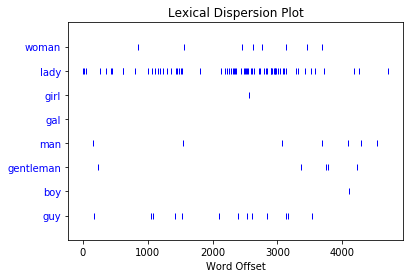

In [109]:
text8.dispersion_plot(
...     ["woman", "lady", "girl", "gal", "man", "gentleman", "boy", "guy"]
... )

Each vertical blue line represents one instance of a word. Each horizontal row of blue lines represents the corpus as a whole. This plot shows that:

"lady" was used a lot more than "woman" or "girl". There were no instances of "gal".
"man" and "guy" were used a similar number of times and were more common than "gentleman" or "boy".
You use a dispersion plot when you want to see where words show up in a text or corpus. If you’re analyzing a single text, this can help you see which words show up near each other. If you’re analyzing a corpus of texts that is organized chronologically, it can help you see which words were being used more or less over a period of time.

Staying on the theme of romance, see what you can find out by making a dispersion plot for Sense and Sensibility, which is text2. Jane Austen novels talk a lot about people’s homes, so make a dispersion plot with the names of a few homes:

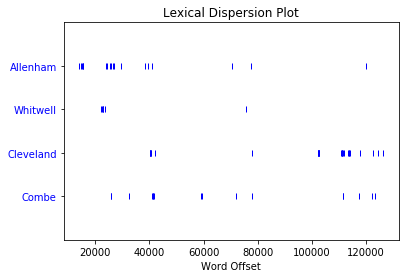

In [110]:
text2.dispersion_plot(["Allenham", "Whitwell", "Cleveland", "Combe"])

Apparently Allenham is mentioned a lot in the first third of the novel and then doesn’t come up much again. Cleveland, on the other hand, barely comes up in the first two thirds but shows up a fair bit in the last third. This distribution reflects changes in the relationship between Marianne and Willoughby:

Allenham is the home of Willoughby’s benefactress and comes up a lot when Marianne is first interested in him.
Cleveland is a home that Marianne stays at after she goes to see Willoughby in London and things go wrong.

# Making a Frequency Distribution
With a frequency distribution, you can check which words show up most frequently in your text. You’ll need to get started with an import:

In [111]:
from nltk import FreqDist

In [112]:
frequency_distribution = FreqDist(text8)
>>> print(frequency_distribution)

<FreqDist with 1108 samples and 4867 outcomes>


Since 1108 samples and 4867 outcomes is a lot of information, start by narrowing that down. Here’s how to see the 20 most common words in the corpus:

In [113]:
frequency_distribution.most_common(20)


[(',', 539),
 ('.', 353),
 ('/', 110),
 ('for', 99),
 ('and', 74),
 ('to', 74),
 ('lady', 68),
 ('-', 66),
 ('seeks', 60),
 ('a', 52),
 ('with', 44),
 ('S', 36),
 ('ship', 33),
 ('&', 30),
 ('relationship', 29),
 ('fun', 28),
 ('in', 27),
 ('slim', 27),
 ('build', 27),
 ('o', 26)]

In [114]:
meaningful_words = [
...     word for word in text8 if word.casefold() not in stop_words
... ]

Now that you have a list of all of the words in your corpus that aren’t stop words, make a frequency distribution:

In [115]:
frequency_distribution = FreqDist(meaningful_words)

In [116]:
frequency_distribution.most_common(20)

[(',', 539),
 ('.', 353),
 ('/', 110),
 ('lady', 68),
 ('-', 66),
 ('seeks', 60),
 ('ship', 33),
 ('&', 30),
 ('relationship', 29),
 ('fun', 28),
 ('slim', 27),
 ('build', 27),
 ('smoker', 23),
 ('50', 23),
 ('non', 22),
 ('movies', 22),
 ('good', 21),
 ('honest', 20),
 ('dining', 19),
 ('rship', 18)]

You can turn this list into a graph:

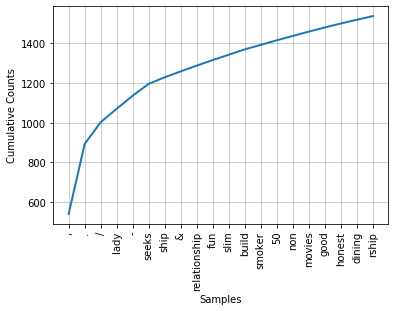

In [118]:
frequency_distribution.plot(20, cumulative=True)

# Finding Collocations
A collocation is a sequence of words that shows up often. If you’re interested in common collocations in English, then you can check out The BBI Dictionary of English Word Combinations. It’s a handy reference you can use to help you make sure your writing is idiomatic. Here are some examples of collocations that use the word “tree”:

Syntax tree
Family tree
Decision tree
To see pairs of words that come up often in your corpus, you need to call .collocations() on it:

In [119]:
text8.collocations()

would like; medium build; social drinker; quiet nights; non smoker;
long term; age open; Would like; easy going; financially secure; fun
times; similar interests; Age open; weekends away; poss rship; well
presented; never married; single mum; permanent relationship; slim
build


slim build did show up, as did medium build and several other word combinations. No long walks on the beach though!

But what would happen if you looked for collocations after lemmatizing the words in your corpus? Would you find some word combinations that you missed the first time around because they came up in slightly varied versions?

If you followed the instructions earlier, then you’ll already have a lemmatizer, but you can’t call collocations() on just any data type, so you’re going to need to do some prep work. Start by creating a list of the lemmatized versions of all the words in text8:

In [121]:
lemmatized_words = [lemmatizer.lemmatize(word) for word in text8]

In [122]:
new_text = nltk.Text(lemmatized_words)

In [123]:
new_text.collocations()

medium build; social drinker; non smoker; quiet night; long term;
would like; age open; easy going; financially secure; Would like; fun
time; similar interest; Age open; weekend away; well presented; never
married; single mum; permanent relationship; year old; slim build


Compared to your previous list of collocations, this new one is missing a few:

weekends away
poss rship
The idea of quiet nights still shows up in the lemmatized version, quiet night. Your latest search for collocations also brought up a few news ones:

year old suggests that users often mention ages.
photo pls suggests that users often request one or more photos.
That’s how you can find common word combinations to see what people are talking about and how they’re talking about it!

# Conclusion
Congratulations on taking your first steps with NLP! A whole new world of unstructured data is now open for you to explore. Now that you’ve covered the basics of text analytics tasks, you can get out there are find some texts to analyze and see what you can learn about the texts themselves as well as the people who wrote them and the topics they’re about.

Now you know how to:

Find text to analyze
Preprocess your text for analysis
Analyze your text
Create visualizations based on your analysis